In [2]:
## The issue for Mac Users...
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib.pyplot as plt

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import Sequential

print(tf.__version__)

2.0.0


In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

train_dataset, test_dataset = dataset['train'], dataset['test']

In [5]:
class_name = ['T-Shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boat']

In [6]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print("Number of training examples: {}" .format(num_train_examples))
print("Number of test examples: {}" .format(num_test_examples))

Number of training examples: 60000
Number of test examples: 10000


In [7]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

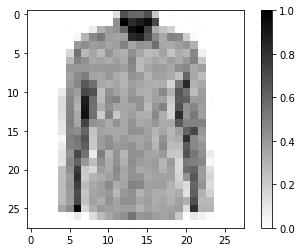

In [8]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break

image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

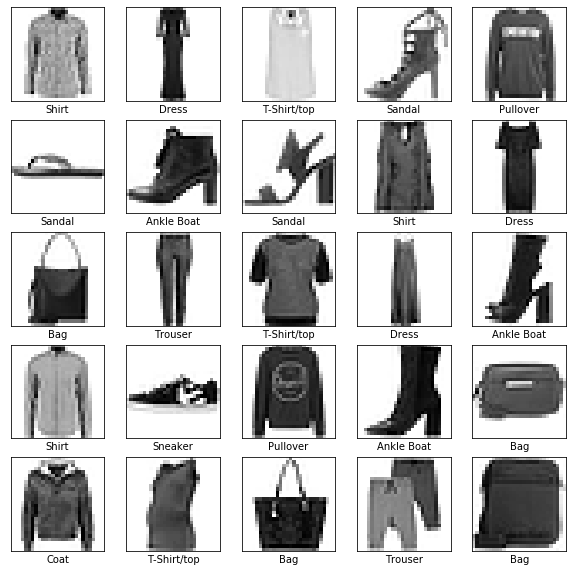

In [9]:
plt.figure(figsize=(10, 10))
i = 0

for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28, 28))
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap = plt.cm.binary)
    plt.xlabel(class_name[label])
    i += 1

plt.show

In [10]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation=tf.nn.relu),
    Dense(10,  activation=tf.nn.softmax)
])

# model = Sequential()
# model.add(Flatten(input_shape=(28,28,1)))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.repeat().shuffle(num_test_examples).batch(BATCH_SIZE)


In [13]:
model.fit(
    train_dataset, 
    epochs=5, 
    steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE)
)

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.4955 - accuracy: 0.8246
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3733 - accuracy: 0.8673
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3349 - accuracy: 0.8768
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3120 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2906 - accuracy: 0.8929


In [14]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [15]:
predictions.shape

(32, 10)

In [16]:
predictions[0]

array([1.3294503e-08, 5.9890938e-12, 2.2106628e-10, 9.1892032e-12,
       1.8924315e-10, 3.1900419e-07, 4.2862887e-09, 2.0115286e-04,
       3.7138648e-08, 9.9979848e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

In [19]:
class_name[9]

'Ankle Boat'

In [30]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[..., 0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                    100*np.max(predictions_array),
                                    class_name[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

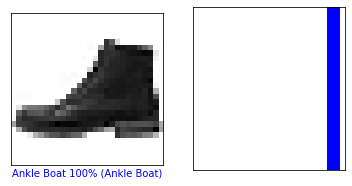

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

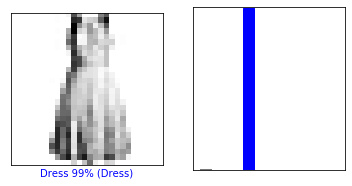

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

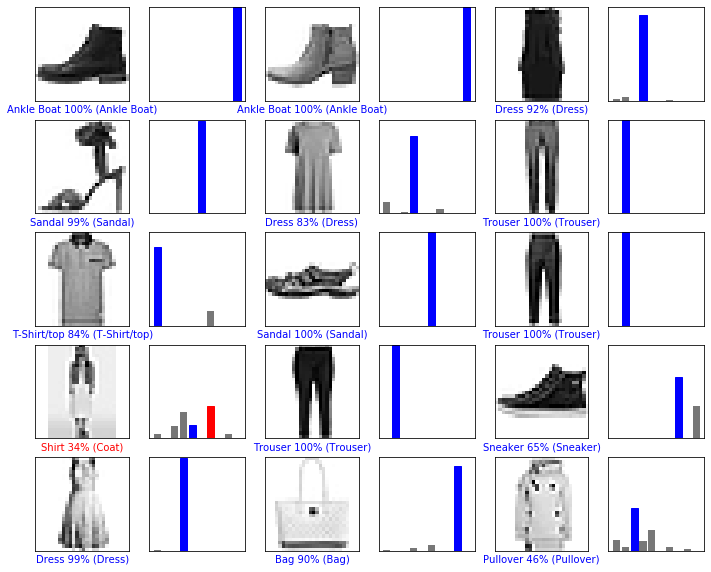

In [33]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [34]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [35]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [36]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.3294528e-08 5.9891050e-12 2.2106712e-10 9.1892553e-12 1.8924387e-10
  3.1900512e-07 4.2863046e-09 2.0115323e-04 3.7138790e-08 9.9979848e-01]]


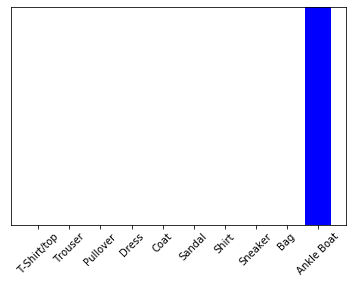

In [38]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_name, rotation=45)

In [39]:
np.argmax(predictions_single[0])

9